# Homework 2 - Linear Regression - Car fuel efficiency

## Libraries 

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Download, loading dataset , overview

In [112]:
#Download Car Fuel Efficiency  dataset
!curl -O https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  1  853k    1 12402    0     0   5430      0  0:02:40  0:00:02  0:02:38  5461
 44  853k   44  376k    0     0   117k      0  0:00:07  0:00:03  0:00:04  118k
100  853k  100  853k    0     0   222k      0  0:00:03  0:00:03 --:--:--  223k


In [227]:
#Read the dataset
df =pd.read_csv('car_fuel_efficiency.csv')

In [229]:
#First five lines
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [233]:
#Numbers lines and columns
df.shape

(9704, 11)

## EDA 

In [236]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [238]:
#Statistical summary
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


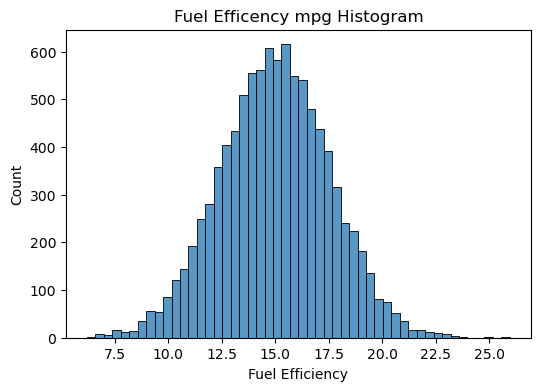

In [240]:
plt.figure(figsize=(6,4))
sns.histplot(df.fuel_efficiency_mpg, bins=50)
plt.title('Fuel Efficency mpg Histogram')
plt.xlabel('Fuel Efficiency')
plt.show()

## Q 1 

In [243]:
print("Columns with missng values :", df.columns[df.isnull().any()].tolist())
df.isnull().sum()


Columns with missng values : ['horsepower']


engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Q2 - Calculate median horsepower

In [246]:
median_horsepower = df['horsepower'].median()
print(f'The median for "horsepower" : {median_horsepower}')

The median for "horsepower" : 149.0


## Prepare and split dataset : train, validation, and test sets

In [249]:
np.random.seed(42)
num_samples = len(df)

# Calculate split sizes (20% validation, 20% test, 60% train)
num_validation = int(num_samples * 0.2)
num_test = int(num_samples * 0.2)
num_train = num_samples - num_validation - num_test

num_samples, num_train, num_validation, num_test

(9704, 5824, 1940, 1940)

In [251]:
indices = np.arange(num_samples)
np.random.seed(42)
np.random.shuffle(indices)
indices

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [253]:
data_train = df.iloc[indices[:num_train]]
data_validation = df.iloc[indices[num_train:num_train+num_validation]]
data_test = df.iloc[indices[num_train+num_validation:]]

len(data_train), len(data_validation), len(data_test)

(5824, 1940, 1940)

In [255]:
data_train = data_train.reset_index(drop=True)
data_validation = data_validation.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

## Q3 - Define feature columns

In [258]:
df.info()

feature_columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'age']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


## Linear Regression Training Function

In [261]:
def train_linear_regression(X, y, regularization=0):
   
    # Add bias term (column of ones)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # Calculate (X^T * X) with regularization
    XTX = X.T.dot(X)
    XTX = XTX + regularization * np.eye(XTX.shape[0])
    
    # Solve for weights using inverse
    XTX_inv = np.linalg.inv(XTX)
    weights_full = XTX_inv.dot(X.T).dot(y)
    
    return weights_full[0], weights_full[1:]

In [263]:
def prepare_features(dataframe, columns, fill_method):
   
    # Calculate vehicle age
    dataframe['age'] = dataframe.model_year.max() - dataframe.model_year
    
    # Select numeric features
    features_df = dataframe[columns]
    
    # Handle missing values based on specified method
    if fill_method == "zero":
        features_df = features_df.fillna(0)
        X = features_df.values
    elif fill_method == "mean":
        mean_horsepower = features_df['horsepower'].mean()
        features_df.horsepower.fillna(mean_horsepower, inplace=True)
        X = features_df.values
    else: 
        print('invalid option')
    
    return X

In [265]:
def calculate_rmse(y_actual, y_predicted):
   
    error = y_predicted - y_actual
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [267]:
def plot_prediction_distribution(y_actual, y_predicted):
   
    sns.histplot(y_actual, label='target', color='red', alpha=0.5, bins=50)
    sns.histplot(y_predicted, label='prediction', color='blue', alpha=0.5, bins=50)
    
    plt.legend()
    plt.ylabel('Frequency')
    plt.xlabel('fuel efficiency mpg')
    plt.title('Predictions vs actual distribution')
    plt.show()

In [269]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## Q3.1 - Filling missing values with 0

validation filling with zero 0.52


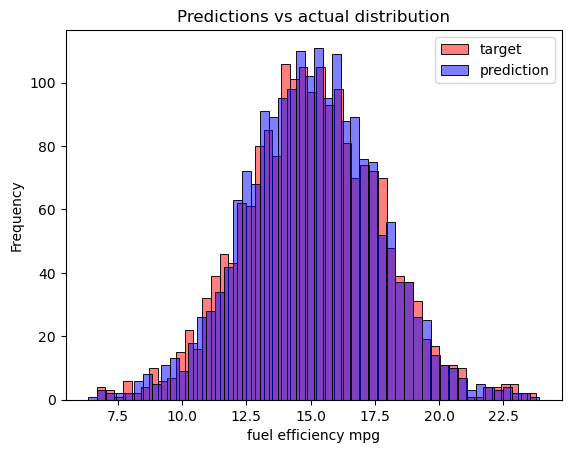

In [272]:
X_train_zero = prepare_features(data_train, feature_columns, 'zero')
y_train = data_train.fuel_efficiency_mpg.values
bias_zero, weights_zero = train_linear_regression(X_train_zero, y_train, regularization=0)

X_validation_zero = prepare_features(data_validation, feature_columns, 'zero')
y_validation = data_validation.fuel_efficiency_mpg.values

y_pred_zero = bias_zero + X_validation_zero.dot(weights_zero)

print('validation filling with zero', round(calculate_rmse(y_validation, y_pred_zero), 2))

plot_prediction_distribution(y_validation, y_pred_zero)

## Filling missing values with mean value

C:\Users\Admin-IT\AppData\Local\Temp\ipykernel_13304\2024311548.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_df.horsepower.fillna(mean_horsepower, inplace=True)
C:\Users\Admin-IT\AppData\Local\Temp\ipykernel_13304\2024311548.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.horsepower.fillna(mean_horsepower, inp

validation filling with mean value 0.46


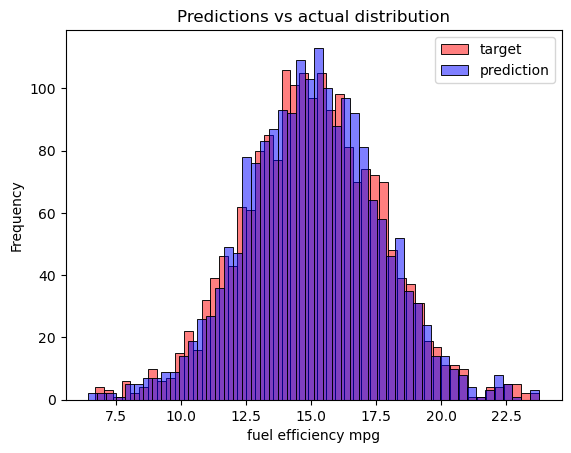

In [274]:
X_train_mean = prepare_features(data_train, feature_columns, 'mean')
y_train = data_train.fuel_efficiency_mpg.values
bias_mean, weights_mean = train_linear_regression(X_train_mean, y_train, regularization=0)

X_validation_mean = prepare_features(data_validation, feature_columns, 'mean')
y_validation = data_validation.fuel_efficiency_mpg.values

y_pred_mean = bias_mean + X_validation_mean.dot(weights_mean)

print('validation filling with mean value', round(calculate_rmse(y_validation, y_pred_mean), 2))

plot_prediction_distribution(y_validation, y_pred_mean)

## Question 4 - Testing different regularization values

In [277]:
X_train_zero = prepare_features(data_train, feature_columns, 'zero')
y_train = data_train.fuel_efficiency_mpg.values
X_validation_zero = prepare_features(data_validation, feature_columns, 'zero')
y_validation = data_validation.fuel_efficiency_mpg.values


In [278]:
regularization_values = [0, 0.01, 1, 10, 100]
rmse_scores = []

In [279]:
# Train model with different regularization values
for reg in regularization_values:
    bias_zero, weights_zero = train_linear_regression(X_train_zero, y_train, regularization=reg)
    y_pred_zero = bias_zero + X_validation_zero.dot(weights_zero)
    rmse_score = calculate_rmse(y_validation, y_pred_zero)
    rmse_scores.append(rmse_score)

In [281]:
# Display results
for reg, rmse_score in zip(regularization_values, rmse_scores):
    print(f' For r = {reg}, RMSE = {rmse_score}')

 For r = 0, RMSE = 0.5173782638840938
 For r = 0.01, RMSE = 0.5173748966572376
 For r = 1, RMSE = 0.5187375615521794
 For r = 10, RMSE = 0.6407574659641431
 For r = 100, RMSE = 2.058982175918233


In [286]:
# Find best regularization value
min_rmse = min(rmse_scores)
best_reg_index = rmse_scores.index(min_rmse)

print(f'The minimum value for RMSE = {min_rmse} is r = {regularization_values[best_reg_index]}')


The minimum value for RMSE = 0.5173748966572376 is r = 0.01


## Q5 - Testing stability across different random seeds

In [353]:
seed_values = [i for i in range(10)]
rmse_scores = []

for seed in seed_values:
    # Shuffle indices with current seed
    indices = np.arange(num_samples)
    np.random.seed(seed)
    np.random.shuffle(indices)
    
    # Split data using shuffled indices
    data_train = df.iloc[indices[:num_train]].copy()
    data_validation = df.iloc[indices[num_train:num_train+num_validation]].copy()
    data_test = df.iloc[indices[num_train+num_validation:]].copy()
    
    # Reset index in each dataframe
    data_train = data_train.reset_index(drop=True)
    data_validation = data_validation.reset_index(drop=True)
    data_test = data_test.reset_index(drop=True)
    
    # Prepare features and train model
    X_train_zero = prepare_features(data_train, feature_columns, 'zero')
    y_train = data_train.fuel_efficiency_mpg.values
    bias_zero, weights_zero = train_linear_regression(X_train_zero, y_train, regularization=0)
    
    # Prepare validation features and make predictions
    X_validation_zero = prepare_features(data_validation, feature_columns, 'zero')
    y_validation = data_validation.fuel_efficiency_mpg.values
    
    y_pred_zero = bias_zero + X_validation_zero.dot(weights_zero)
    
    # Calculate and store RMSE
    rmse_score = calculate_rmse(y_validation, y_pred_zero)
    rmse_scores.append(rmse_score)

# Display results for each seed
for seed, rmse_score in zip(seed_values, rmse_scores):
    print(f' For seed = {seed}, RMSE = {rmse_score}')

print('')
print(f'The standard deviation of all RMSE scores is = {round(np.std(rmse_scores), 3)}')




 For seed = 0, RMSE = 0.5206531296298065
 For seed = 1, RMSE = 0.5213388912856983
 For seed = 2, RMSE = 0.5228069974801907
 For seed = 3, RMSE = 0.5159516741173608
 For seed = 4, RMSE = 0.5109129460065429
 For seed = 5, RMSE = 0.5283406460165951
 For seed = 6, RMSE = 0.5313910658170673
 For seed = 7, RMSE = 0.5090670387374354
 For seed = 8, RMSE = 0.5147399129350871
 For seed = 9, RMSE = 0.5131865908330969

The standard deviation of all RMSE scores is = 0.007


## Q6 - Final evaluation on test set 

In [311]:
indices = np.arange(num_samples)
np.random.seed(9)
np.random.shuffle(indices)

data_train = df.iloc[indices[:num_train]].copy()
data_validation = df.iloc[indices[num_train:num_train+num_validation]].copy()
data_test = df.iloc[indices[num_train+num_validation:]].copy()

In [313]:
# Combine train and validation sets for final training
data_full_train = pd.concat([data_train, data_validation])

# Reset index in each dataframe
data_full_train = data_full_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [315]:
#Train final model on combined training data
X_full_train = prepare_features(data_full_train, feature_columns, 'zero')
y_full_train = data_full_train.fuel_efficiency_mpg.values

bias_final, weights_final = train_linear_regression(X_full_train, y_full_train, regularization=0.001)

In [317]:
# Evaluate on test set
X_test = prepare_features(data_test, feature_columns, 'zero')
y_test = data_test.fuel_efficiency_mpg.values

y_pred = bias_final + X_test.dot(weights_final)

rmse_test = calculate_rmse(y_test, y_pred)
print(f'RMSE = {round(rmse_test, 3)}')

RMSE = 0.516
